In [9]:
import numpy as np
import matplotlib.pyplot as plt

!pip install wfdb
import wfdb

from google.colab import files  # ← ESTA LÍNEA FALTABA

uploaded = files.upload()

Saving 100.hea to 100 (1).hea
Saving 100.pwave to 100 (1).pwave


#**Parte A**

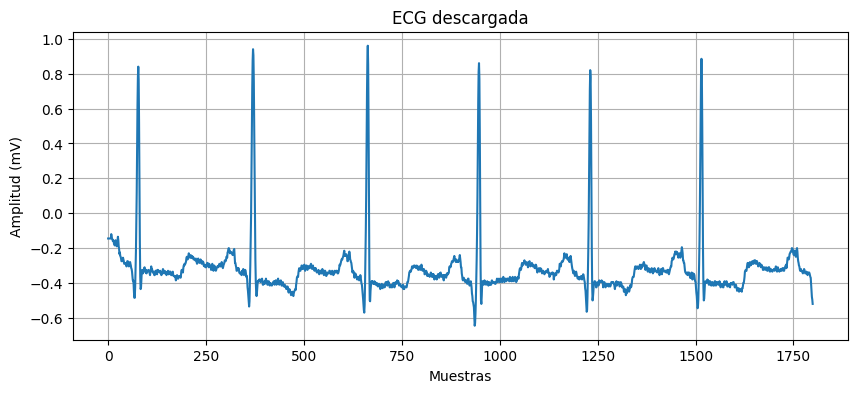

In [31]:
import wfdb
import matplotlib.pyplot as plt

signals, fields = wfdb.rdsamp('100', pn_dir='mitdb')


ecg_1 = signals[:, 0]

fs = fields['fs']
muestras_5s = int(fs * 5)

plt.figure(figsize=(10,4))
plt.plot(ecg_1[0:muestras_5s])
plt.ylabel("Amplitud (mV)")
plt.xlabel("Muestras")
plt.title("ECG descargada")
plt.grid()
plt.show()



In [14]:
print(f"Datos con funciones")

#media
media=np.mean(ecg_1)
print (f"Media: {media} ")

#mediana
mediana=np.median(ecg_1)
print (f"Mediana: {mediana} ")

#desviación estandar
desviacion_muestra=np.std(ecg_1, ddof=1)
print (f"Desviacion estandar: {desviacion_muestra} ")

# asimetría (skewness)
asimetria = skew(ecg_1, bias=False)
print(f"Asimetria (skewness): {asimetria}")

#coeficiente de variacion
coef_var = (desviacion_muestra / abs(media)) * 100
print(f"Coeficiente de variacion: {coef_var:.2f}%")

#curtosis
n=len(ecg_1)
curtosis=np.sum(((ecg_1-media)/desviacion_muestra)**4)/n
print(f"Curtosis: {curtosis}")


Datos con funciones
Media: -0.3062989769230769 
Mediana: -0.335 
Desviacion estandar: 0.19319969075242077 
Asimetria (skewness): 4.4261478025110375
Coeficiente de variacion: 63.08%
Curtosis: 28.413018422958583


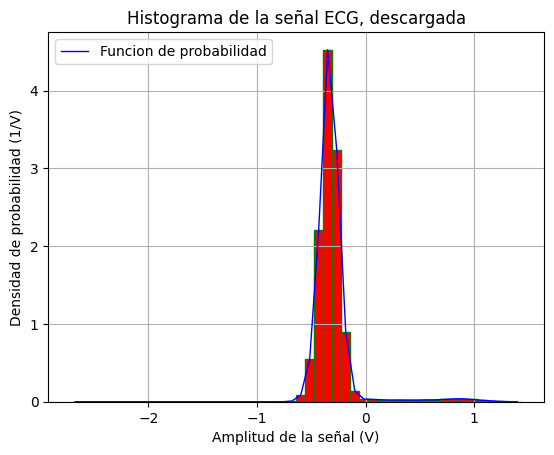

In [15]:
cuentas, bins, _=plt.hist(ecg_1, bins=50, color='red', edgecolor='green', density=True)

#funcion de probabilidad
funcion_prob=0.5*(bins[1:]+ bins[:-1])
plt.plot(funcion_prob, cuentas, color='blue', linewidth=1, label="Funcion de probabilidad")

#histograma
plt.title("Histograma de la señal ECG, descargada")
plt.ylabel("Densidad de probabilidad (1/V)")
plt.xlabel("Amplitud de la señal (V)")
plt.grid()
plt.legend()
plt.show()


In [16]:
print("Datos sin funciones")

n = len(ecg_1)


# MEDIA

suma = 0
for valor in ecg_1:
    suma += valor

media = suma / n
print(f"Media: {media}")


# MEDIANA

datos_ordenados = sorted(ecg_1)

if n % 2 == 0:
    mediana = (datos_ordenados[n//2 - 1] + datos_ordenados[n//2]) / 2
else:
    mediana = datos_ordenados[n//2]

print(f"Mediana: {mediana}")


# DESVIACIÓN ESTÁNDAR

suma_cuadrados = 0
for valor in ecg_1:
    suma_cuadrados += (valor - media) ** 2

varianza = suma_cuadrados / (n - 1)
desviacion = varianza ** 0.5

print(f"Desviacion estandar: {desviacion}")

# ASIMETRÍA (SKEWNESS)
suma_cubo = 0
for valor in ecg_1:
    suma_cubo += ((valor - media) / desviacion) ** 3

asimetria = (n / ((n - 1) * (n - 2))) * suma_cubo

print(f"Asimetria: {asimetria}")

# COEFICIENTE DE VARIACIÓN

coef_variacion = (desviacion / abs(media)) * 100
print(f"Coeficiente de variacion: {coef_variacion:.2f}%")


# CURTOSIS

suma_cuarta = 0
for valor in ecg_1:
    suma_cuarta += (valor - media) ** 4

curtosis = (suma_cuarta / n) / (varianza ** 2)

print(f"Curtosis: {curtosis}")



Datos sin funciones
Media: -0.30629897692306546
Mediana: -0.335
Desviacion estandar: 0.1931996907525729
Asimetria: 4.426147802499588
Coeficiente de variacion: 63.08%
Curtosis: 28.413018422874092


#**Parte B**

In [18]:
from google.colab import files
import csv

uploaded = files.upload()

nombre_archivo = next(iter(uploaded))


Saving lectura_adoriginal.csv to lectura_adoriginal (1).csv


In [19]:
with open(nombre_archivo, newline='', encoding='utf-8') as f:
    lector = csv.reader(f)
    datos_ecg = list(lector)

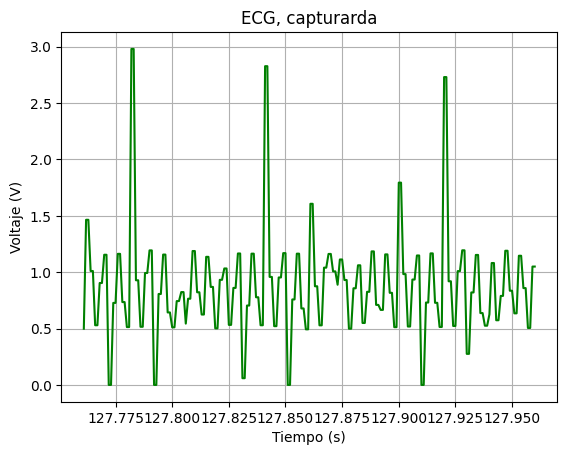

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#datos originalmente en adc, conversion a voltios
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

tiempo = [float(fila[0]) for fila in datos_ecg[1:]] #diferenciar comas como columnas en el excel
adc = [float(fila[1]) for fila in datos_ecg[1:]]
voltios = [a * VREF / FULL_SCALE for a in adc] #conversion

t_inicio = 127.761 #para que los datos sean visibles
t_fin = 127.96
tiempo_filtrado = []
amplitud_filtrada_v = []

for t, a_v in zip(tiempo, voltios):
    if t_inicio <= t <= t_fin:
        tiempo_filtrado.append(t)
        amplitud_filtrada_v.append(a_v)

#grafica
plt.plot(tiempo_filtrado, amplitud_filtrada_v, color='green')
plt.ylabel("Voltaje (V)")
plt.xlabel("Tiempo (s)")
plt.title("ECG, capturarda")
plt.grid()
plt.show()



In [24]:
#datos para conversion
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

adc_calc = np.array([float(fila[1]) for fila in datos_ecg[1:]])
v_calc = adc_calc * VREF / FULL_SCALE #conversion

#media
media=np.mean(v_calc)
print (f"Media: {media} ")

#mediana
mediana=np.median(v_calc)
print (f"Mediana: {mediana} ")

#desviación estandar
desviacion_muestra=np.std(v_calc, ddof=1)
print (f"Desviacion estandar: {desviacion_muestra} ")

# asimetría (skewness)
asimetria = skew(v_calc, bias=False)
print(f"Asimetria (skewness): {asimetria}")

#coeficiente de variacion
coef_var = (desviacion_muestra /abs(media)) * 100
print(f"Coeficiente de variacion: {coef_var:.2f}%")

#curtosis

curtosis = np.sum(((v_calc - abs(media)) / desviacion_muestra) ** 4) / n
print(f"Curtosis: {curtosis}")



Media: 0.8804996336996337 
Mediana: 0.8356776556776556 
Desviacion estandar: 0.4758191679603716 
Asimetria (skewness): 1.9102376871657385
Coeficiente de variacion: 54.04%
Curtosis: 9.784939579218962


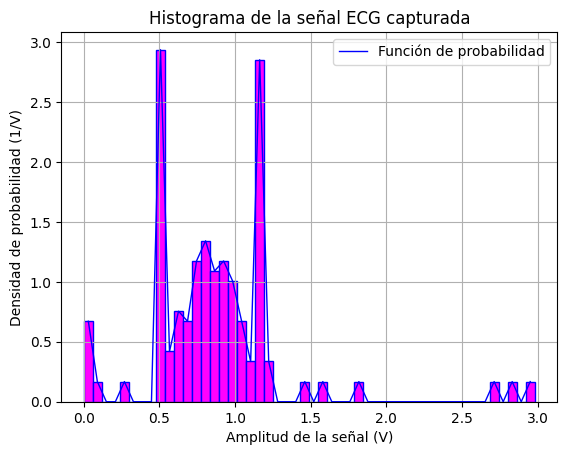

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# datos para conversion
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

valores_ecg_adc = np.array([float(fila[1]) for fila in datos_ecg[1:]])
valores_ecg_v = valores_ecg_adc * VREF / FULL_SCALE  # conversion

# histograma
cuentas, bins, _ = plt.hist(valores_ecg_v,
                            bins=50,
                            color='magenta',
                            edgecolor='blue',
                            density=True)

# funcion de probabilidad
centros = 0.5 * (bins[1:] + bins[:-1])
plt.plot(centros, cuentas,
         color='blue',
         linewidth=1,
         label="Función de probabilidad")

# grafica
plt.title("Histograma de la señal ECG capturada")
plt.ylabel("Densidad de probabilidad (1/V)")
plt.xlabel("Amplitud de la señal (V)")
plt.grid()
plt.legend()
plt.show()


In [32]:
# datos para conversion
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)

adc_calc_2 = [float(fila[1]) for fila in datos_ecg[1:]]
v_calc_2 = [valor * VREF / FULL_SCALE for valor in adc_calc_2]  # conversion

print("Datos sin funciones")


# MEDIA

suma = 0
n = len(v_calc_2)

for valor in v_calc_2:
    suma += valor

media = suma / n
print(f"Media: {media}")


# MEDIANA

datos_ordenados = list(v_calc_2)

for i in range(n):
    for j in range(i+1, n):
        if datos_ordenados[i] > datos_ordenados[j]:
            datos_ordenados[i], datos_ordenados[j] = datos_ordenados[j], datos_ordenados[i]

if n % 2 == 0:
    mediana = (datos_ordenados[n//2 - 1] + datos_ordenados[n//2]) / 2
else:
    mediana = datos_ordenados[n//2]

print(f"Mediana: {mediana}")


# DESVIACIÓN ESTÁNDAR

suma_cuadrados = 0

for valor in v_calc_2:
    suma_cuadrados += (valor - media) ** 2

varianza = suma_cuadrados / (n - 1)
desviacion = varianza ** 0.5

print(f"Desviacion estandar: {desviacion}")


# ASIMETRÍA (SKEWNESS)
suma_cubo = 0
for valor in v_calc_2:
    suma_cubo += ((valor - media) / desviacion) ** 3

asimetria = (n / ((n - 1) * (n - 2))) * suma_cubo

print(f"Asimetria: {asimetria}")


# COEFICIENTE DE VARIACIÓN

coef_variacion = (desviacion / abs(media)) * 100
print(f"Coeficiente de variacion: {coef_variacion:.2f}%")


# CURTOSIS

suma_cuarta = 0

for valor in v_calc_2:
    suma_cuarta += (valor - media) ** 4

curtosis = (suma_cuarta / n) / (varianza ** 2)

print(f"Curtosis: {curtosis}")


Datos sin funciones
Media: 0.8804996336996334
Mediana: 0.8356776556776556
Desviacion estandar: 0.47581916796037166
Asimetria: 1.9102376871657396
Coeficiente de variacion: 54.04%
Curtosis: 9.784939579218957


#**PARTE C**

In [27]:
from google.colab import files
import csv

uploaded = files.upload()

nombre_archivo = next(iter(uploaded))

Saving lectura_adc.csv to lectura_adc (1).csv


In [28]:
with open(nombre_archivo, newline='', encoding='utf-8') as f:
    lector = csv.reader(f)
    datos_ruido= list(lector)

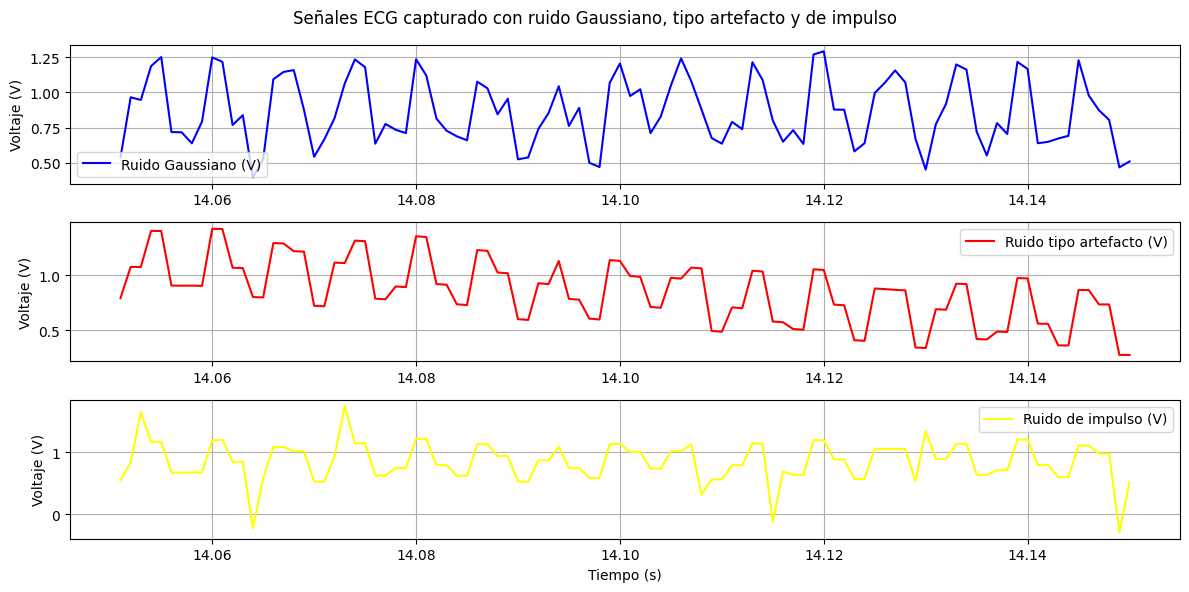

In [29]:
import numpy as np
import matplotlib.pyplot as plt

datos = datos_ruido[1:]

#tomar comas como columnas
tiempo = [float(fila[0]) for fila in datos]
adc    = [float(fila[1]) for fila in datos]
G      = [float(fila[2]) for fila in datos]
A      = [float(fila[3]) for fila in datos]
I      = [float(fila[4]) for fila in datos]

#conversion
BITS = 12
VREF = 3.3
FULL_SCALE = (2**BITS - 1)
adc_v = [valor * VREF / FULL_SCALE for valor in adc]
G_v   = [valor * VREF / FULL_SCALE for valor in G]
A_v   = [valor * VREF / FULL_SCALE for valor in A]
I_v   = [valor * VREF / FULL_SCALE for valor in I]

plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(tiempo, G_v, color="blue", label="Ruido Gaussiano (V)")
plt.ylabel("Voltaje (V)")
plt.legend()
plt.grid()
plt.subplot(3,1,2)
plt.plot(tiempo, A_v, color="red", label="Ruido tipo artefacto (V)")
plt.ylabel("Voltaje (V)")
plt.legend()
plt.grid()
plt.subplot(3,1,3)
plt.plot(tiempo, I_v, color="yellow", label="Ruido de impulso (V)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.legend()
plt.grid()
plt.suptitle("Señales ECG capturado con ruido Gaussiano, tipo artefacto y de impulso")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

print("SNR (sin componente DC)")


# RMS quitando el promedio

def rms_ac(x):
    x = np.asarray(x, dtype=float)
    x = x - np.mean(x)   # quitar componente DC
    return np.sqrt(np.mean(x**2))


# SNR en dB

def snr_db_from_pair(y_clean, y_noisy):
    y_clean = np.asarray(y_clean, dtype=float)
    y_noisy = np.asarray(y_noisy, dtype=float)

    ruido = y_noisy - y_clean

    rc = rms_ac(y_clean)
    rr = rms_ac(ruido)

    if rr == 0:
        return np.inf

    return 20 * np.log10(rc / rr)


# Cálculo SNR

snr_gauss   = snr_db_from_pair(adc_v, G_v)
snr_art     = snr_db_from_pair(adc_v, A_v)
snr_impulso = snr_db_from_pair(adc_v, I_v)

print(f"SNR Ruido Gaussiano: {snr_gauss:.2f} dB")
print(f"SNR Ruido tipo artefacto: {snr_art:.2f} dB")
print(f"SNR Ruido de impulso: {snr_impulso:.2f} dB")


SNR (sin componente DC)
SNR Ruido Gaussiano: 8.39 dB
SNR Ruido tipo artefacto: 2.49 dB
SNR Ruido de impulso: 0.57 dB
